## Importación de las librerías

In [1]:
import utils
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


## Conjuntos de entrenamiento y test y CV controller

In [2]:
X_train, X_test, y_train, y_test = utils.get_train_test_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7776, 12) (1022, 12) (7776,) (1022,)


In [3]:
cv = utils.get_stratified_shuffle_cv()
print(cv)

StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8)


## Carga del mejor árbol de clasificación

Este será el árbol que se empleará para realizar el **xgboost**

In [5]:
decision_tree_model = pickle.load(open('/kaggle/input/decision-tree-model/decision_tree_model.sav', 'rb'))
print(decision_tree_model.criterion)
decision_tree_model

gini


DecisionTreeClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=41,
                       random_state=99)

## Búsqueda del parámetro eta (learning_rate) del xgboosting

Establecemos el subsample a **0.6** como en el resto de metodos, no haremos la búsqueda aquí

In [13]:
param_grid = {
    'n_estimators': list(range(100,501,100)),
    'eta': [0.1, 0.05, 0.03, 0.01, 0.005, 0.001]
}

grid_search_cv = GridSearchCV(
    XGBClassifier(subsample=0.6),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2
)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ..........................eta=0.1, n_estimators=100; total time=   0.6s
[CV] END ..........................eta=0.1, n_estimators=100; total time=   0.6s
[CV] END ..........................eta=0.1, n_estimators=100; total time=   0.7s
[CV] END ..........................eta=0.1, n_estimators=100; total time=   0.6s
[CV] END ..........................eta=0.1, n_estimators=100; total time=   0.6s
[CV] END ..........................eta=0.1, n_estimators=200; total time=   1.2s
[CV] END ..........................eta=0.1, n_estimators=200; total time=   1.2s
[CV] END ..........................eta=0.1, n_estimators=200; total time=   2.0s
[CV] END ..........................eta=0.1, n_estimators=200; total time=   1.3s
[CV] END ..........................eta=0.1, n_estimators=200; total time=   1.4s
[CV] END ..........................eta=0.1, n_estimators=300; total time=   1.9s
[CV] END ..........................eta=0.1, n_e

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_

Seleccionamos el valor del **learning rate** como 0.05

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

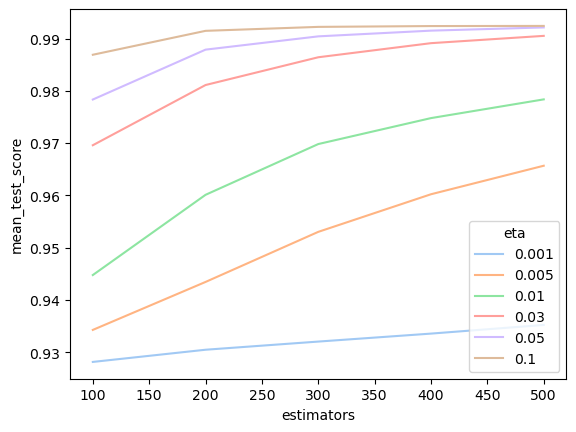

In [14]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
eta_list = list(grid_search_cv.cv_results_['param_eta'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
xgboosting_df = pd.DataFrame(list(zip(estimators_list, eta_list, mean_test_score_list)), columns=['estimators', 'eta', 'mean_test_score'])
sns.lineplot(data=xgboosting_df, x="estimators", y="mean_test_score", hue="eta", legend="full", palette="pastel")

## Búsqueda del parámetro lambda (L2 Regularization) del xgboosting

In [16]:
param_grid = {
    'n_estimators': list(range(100,501,100)),
    'lambda': [0.001, 0.01, 0.1, 0.5, 1]
}

grid_search_cv = GridSearchCV(
    XGBClassifier(subsample=0.6, eta=0.05),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2
)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................lambda=0.001, n_estimators=100; total time=   0.7s
[CV] END .....................lambda=0.001, n_estimators=100; total time=   0.7s
[CV] END .....................lambda=0.001, n_estimators=100; total time=   0.7s
[CV] END .....................lambda=0.001, n_estimators=100; total time=   0.7s
[CV] END .....................lambda=0.001, n_estimators=100; total time=   1.9s
[CV] END .....................lambda=0.001, n_estimators=200; total time=   1.3s
[CV] END .....................lambda=0.001, n_estimators=200; total time=   1.3s
[CV] END .....................lambda=0.001, n_estimators=200; total time=   1.3s
[CV] END .....................lambda=0.001, n_estimators=200; total time=   1.4s
[CV] END .....................lambda=0.001, n_estimators=200; total time=   1.3s
[CV] END .....................lambda=0.001, n_estimators=300; total time=   1.9s
[CV] END .....................lambda=0.001, n_e

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.05,
                                     eval_metric=None, gamma=None, gpu_id=None,
                                     grow_policy=None, i...
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_con

Seleccionamos el valor del **lambda** como **0.5**

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

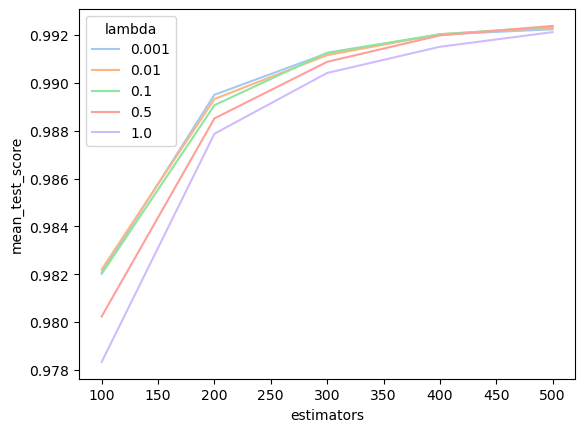

In [17]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
lambda_list = list(grid_search_cv.cv_results_['param_lambda'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
xgboosting_df = pd.DataFrame(list(zip(estimators_list, lambda_list, mean_test_score_list)), columns=['estimators', 'lambda', 'mean_test_score'])
sns.lineplot(data=xgboosting_df, x="estimators", y="mean_test_score", hue="lambda", legend="full", palette="pastel")

## Búsqueda del parámetro n_estimators del xgboosting

In [24]:
param_grid = {
    'n_estimators': list(range(10,501,20))
}

grid_search_cv = GridSearchCV(
    XGBClassifier(subsample=0.6, eta=0.05, reg_lambda=0.5),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2
)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=30; total time=   0.2s
[CV] END ....................................n_estimators=30; total time=   0.2s
[CV] END ....................................n_estimators=30; total time=   0.2s
[CV] END ....................................n_estimators=30; total time=   0.2s
[CV] END ....................................n_estimators=30; total time=   0.3s
[CV] END ....................................n_estimators=50; total time=   0.3s
[CV] END ....................................n_

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.05,
                                     eval_metric=None, gamma=None, gpu_id=None,
                                     grow_policy=None, i...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel

Decidimos que el número de árboles a usar será: **50** ya que la mejora desde allí es insignificativa, además es un modelo menos sobrejustado

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  


<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

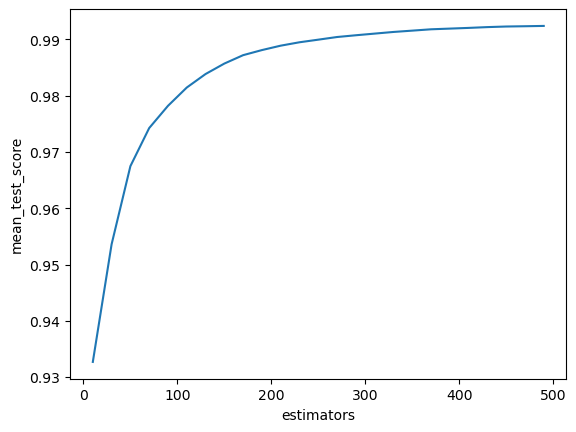

In [25]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
xgboosting_df = pd.DataFrame(list(zip(estimators_list, mean_test_score_list)), columns=['estimators', 'mean_test_score'])
xgboosting_df['mean_test_score_shift'] = xgboosting_df['mean_test_score'].shift().fillna(0)
xgboosting_df['diff'] = (xgboosting_df['mean_test_score'] - xgboosting_df['mean_test_score_shift'])
sns.lineplot(data=xgboosting_df, x="estimators", y="mean_test_score", legend="full", palette="pastel")

In [26]:
xgboosting_df

,estimators,mean_test_score,mean_test_score_shift,diff
0,10,0.932696,0.000000,0.932696
1,30,0.953599,0.932696,0.020903
2,50,0.967471,0.953599,0.013872
3,70,0.974234,0.967471,0.006763
4,90,0.978183,0.974234,0.003948
5,110,0.981432,0.978183,0.003250
6,130,0.983831,0.981432,0.002399
7,150,0.985690,0.983831,0.001859
8,170,0.987183,0.985690,0.001493
9,190,0.988086,0.987183,0.000904


**Modelo de xgboosting**

Confusion matrix, without normalization
[[784 188]
 [ 20  30]]


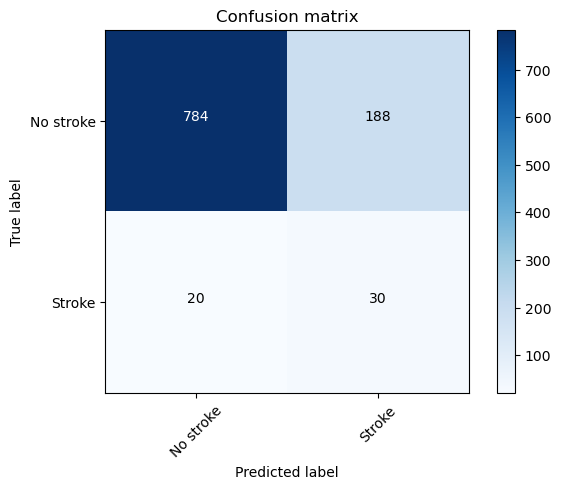

In [52]:
xgboosting_model = XGBClassifier(subsample=0.6, eta=0.05, reg_lambda=0.5, n_estimators=50)

xgboosting_model.fit(X_train, y_train)
y_pred = xgboosting_model.predict(X_test)

cm = utils.get_confusion_matrix(y_test, y_pred)
utils.plot_confusion_matrix(cm=cm, classes=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       0.98      0.81      0.88       972
           1       0.14      0.60      0.22        50

    accuracy                           0.80      1022
   macro avg       0.56      0.70      0.55      1022
weighted avg       0.93      0.80      0.85      1022



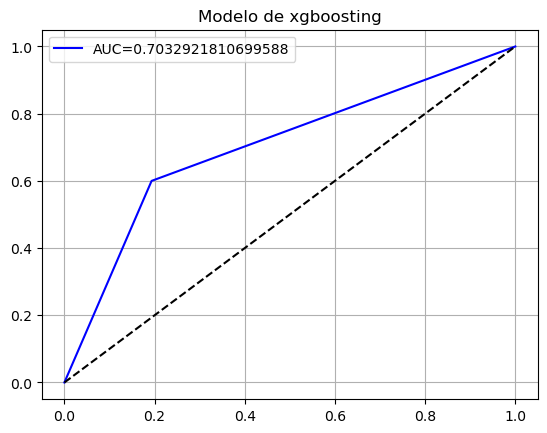

In [53]:
utils.print_metrics(y_test, y_pred, "Modelo de xgboosting")

## Importancia de las variables

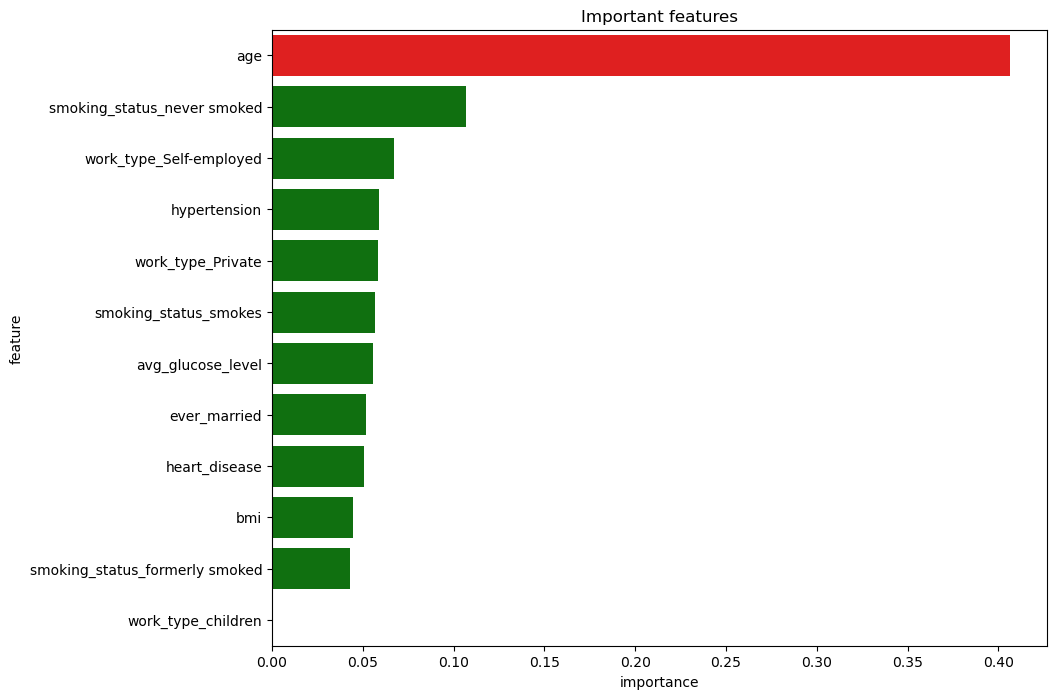

In [54]:
utils.plot_tree_feature_importance(xgboosting_model.feature_names_in_, xgboosting_model.feature_importances_)

**Guardamos el modelo para la comparativa final**

In [55]:
pickle.dump(xgboosting_model, open("xgboosting_model.sav", 'wb'))